In [ ]:
#------------------------PCA---------------!

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [9]:
# Loading dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\PCA\\wine.csv")  
print(data.head())
print("\n")
print(data.info())
print("\n")
print(data.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           

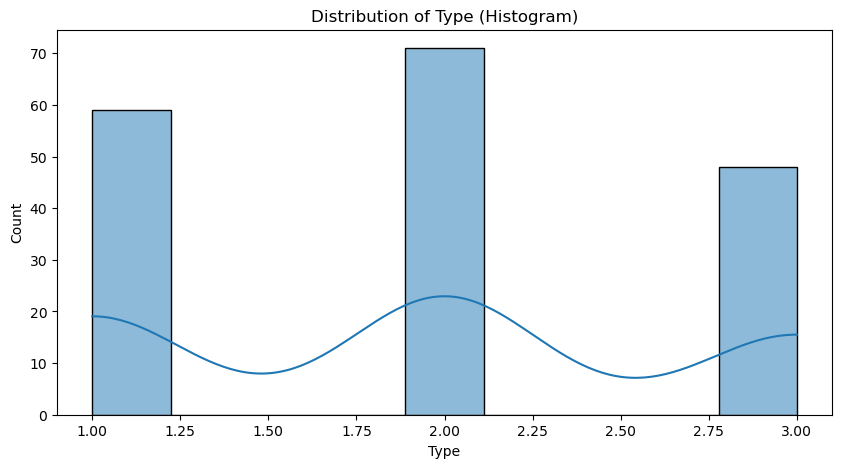

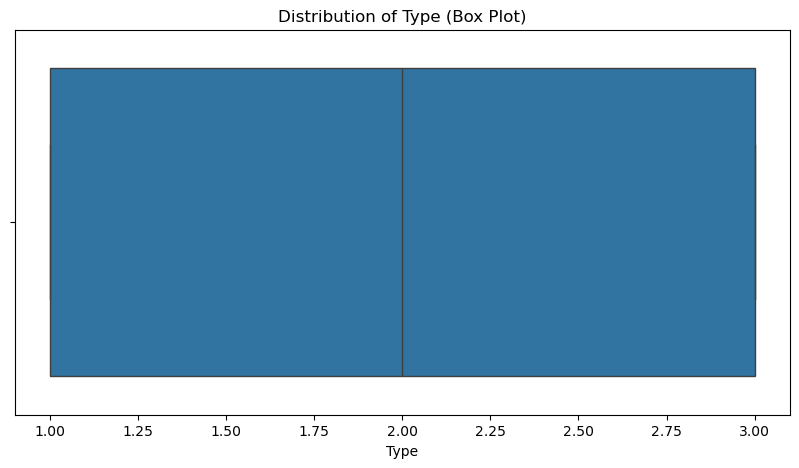

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


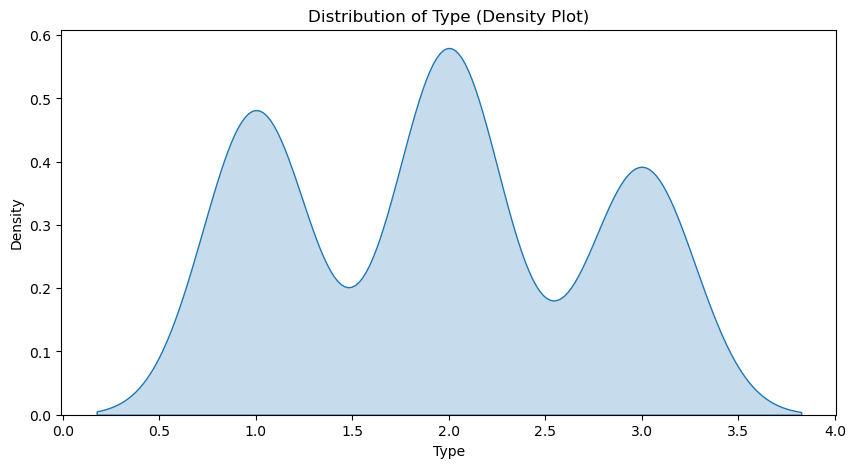

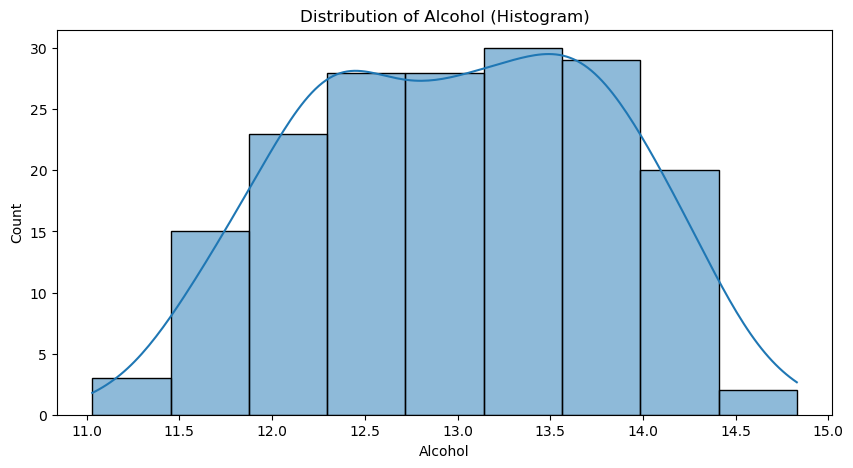

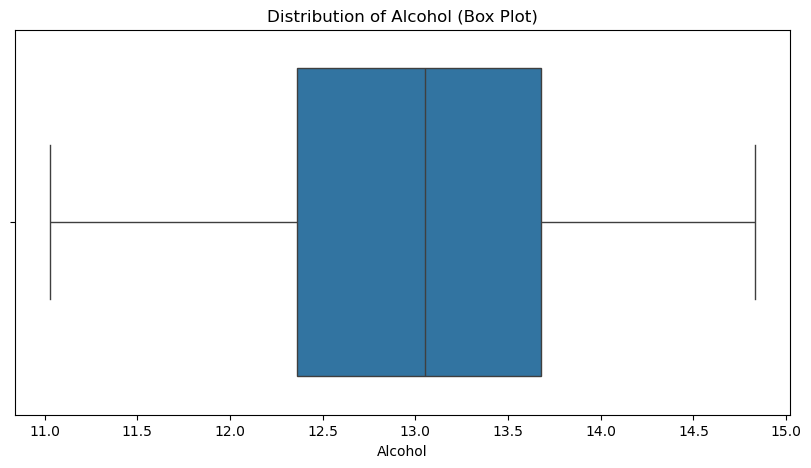

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


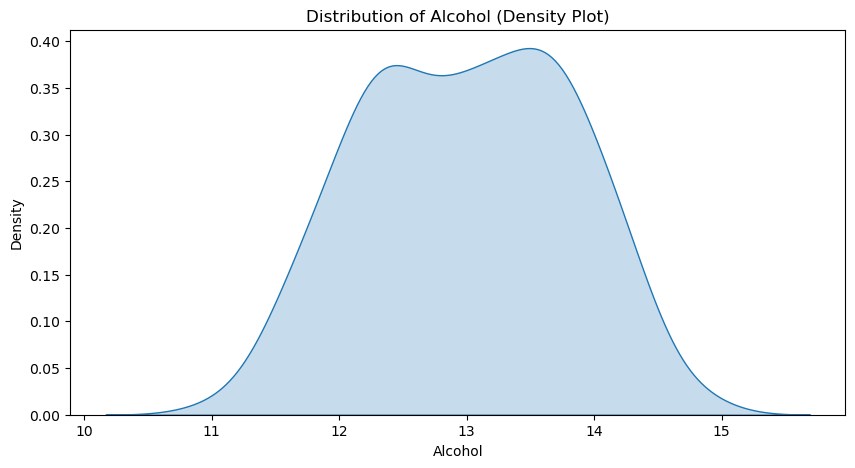

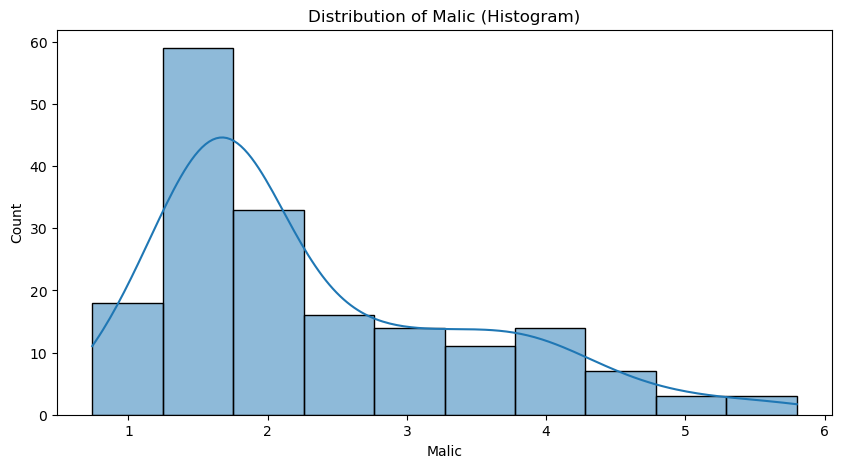

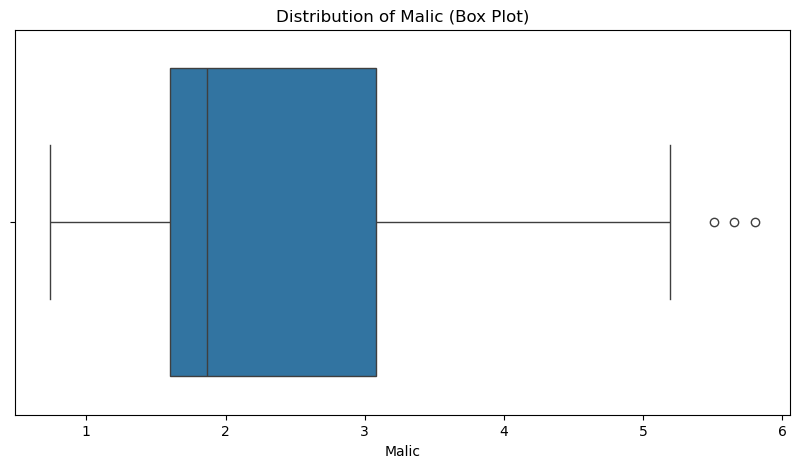

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


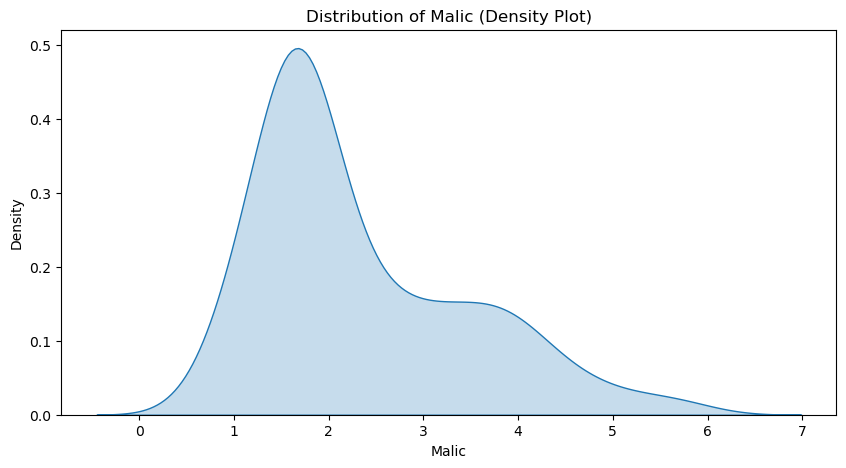

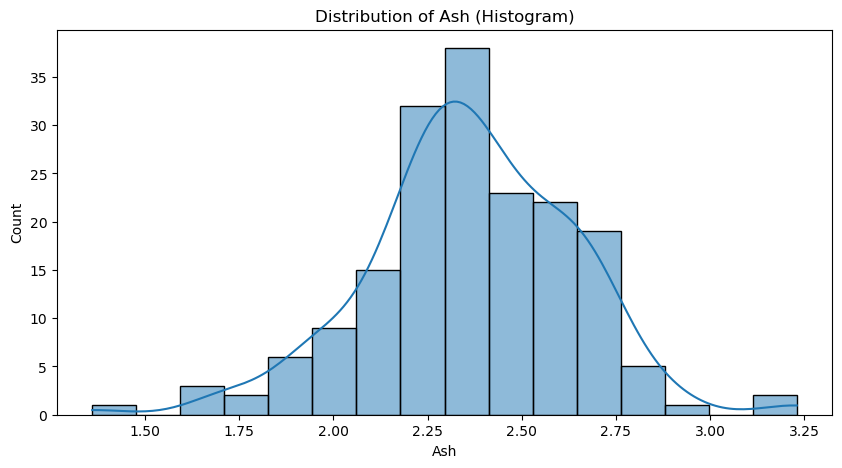

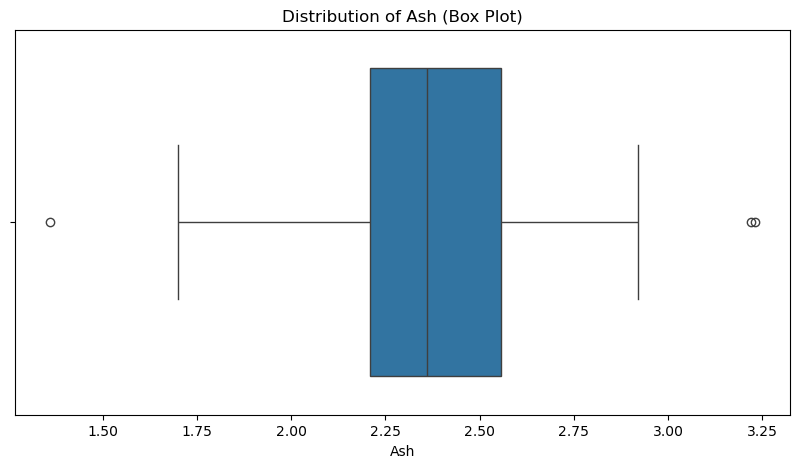

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


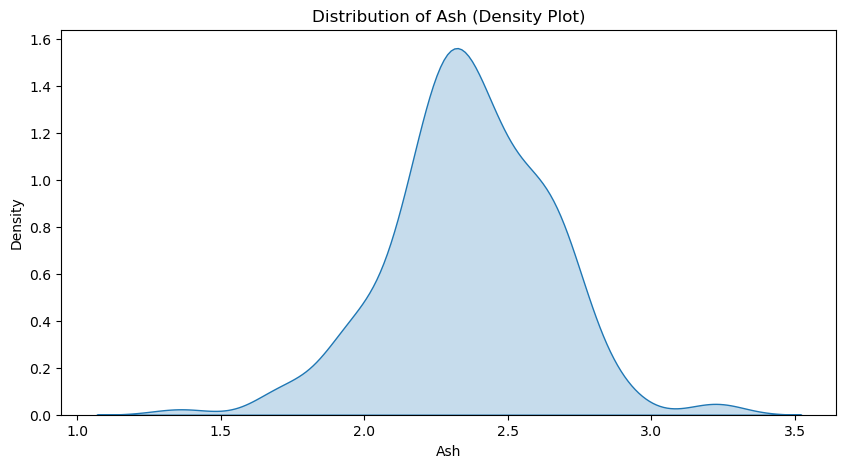

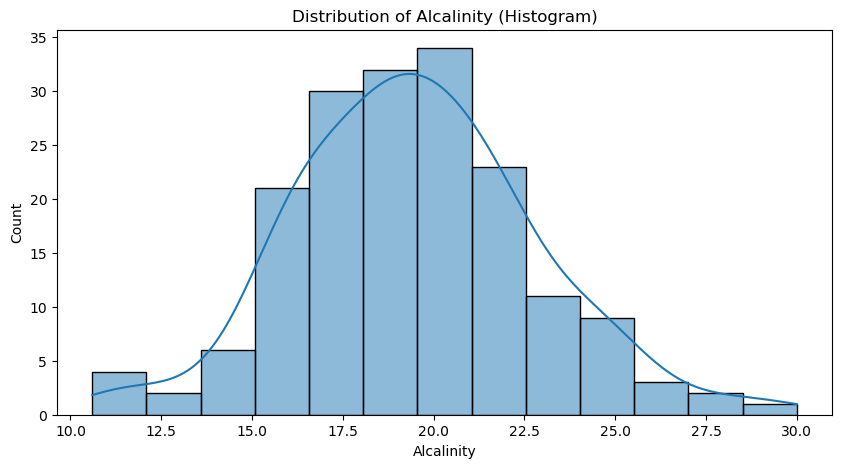

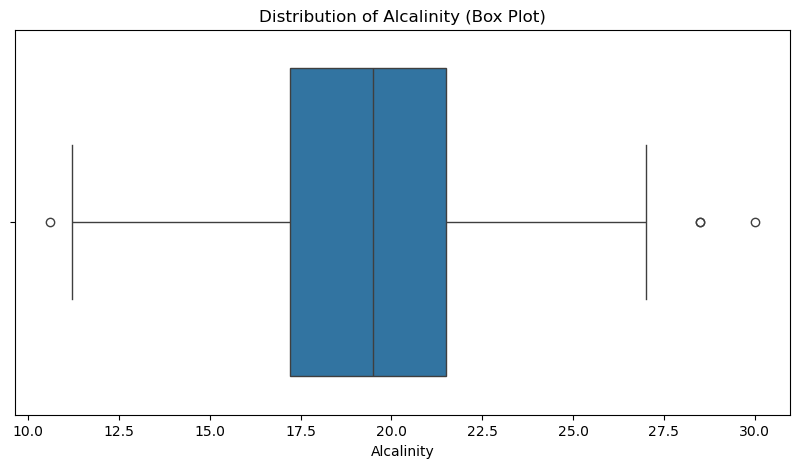

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


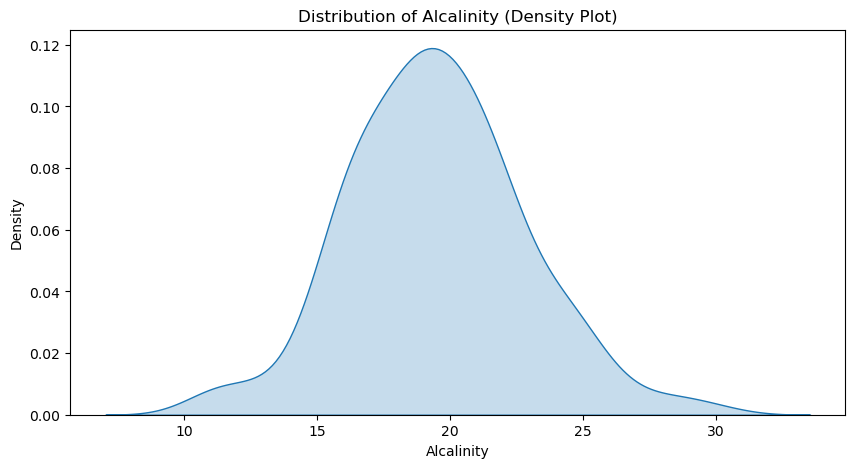

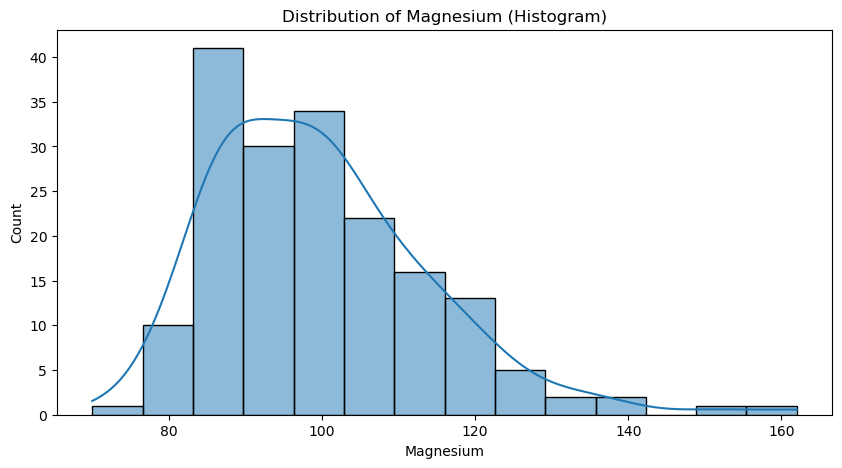

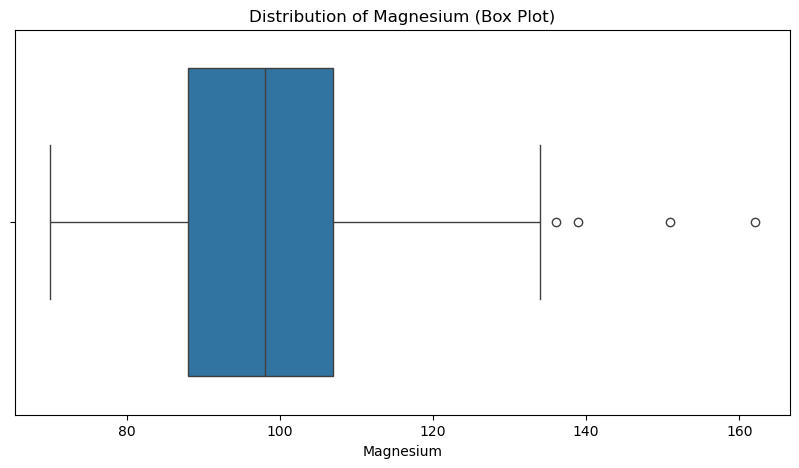

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


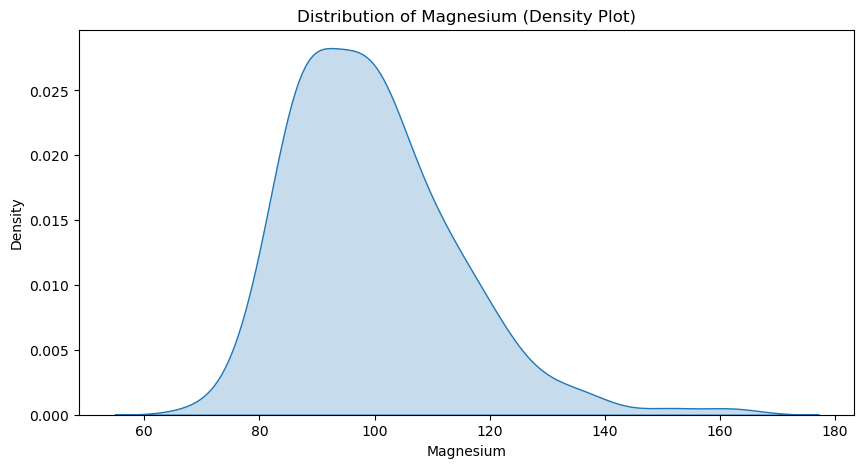

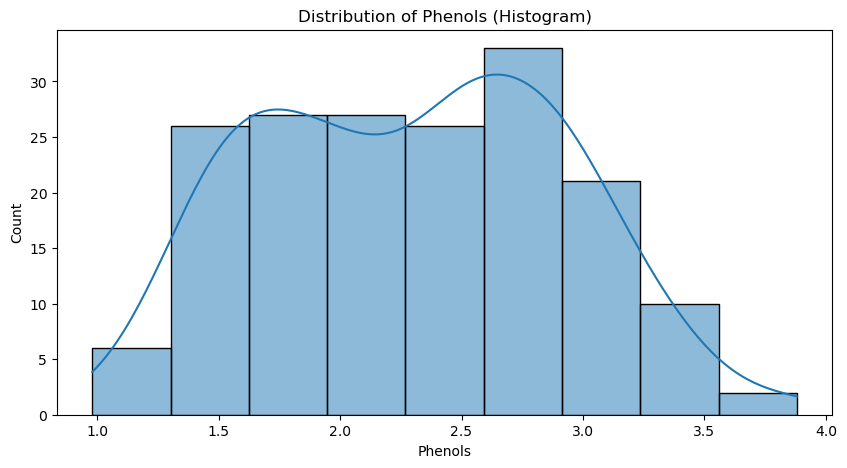

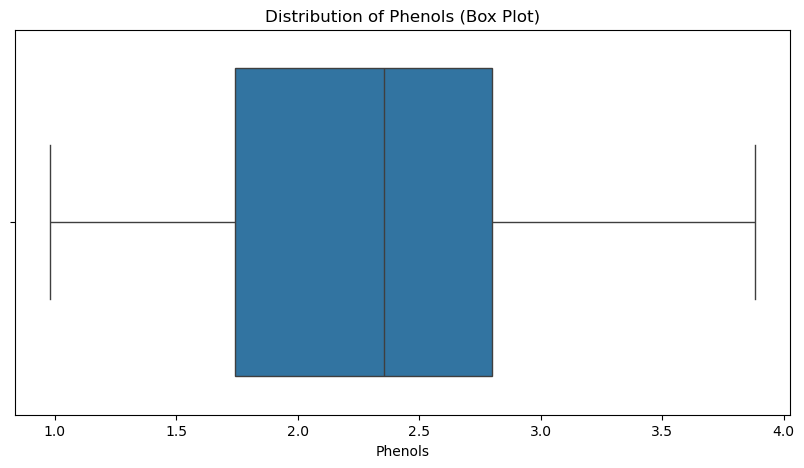

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


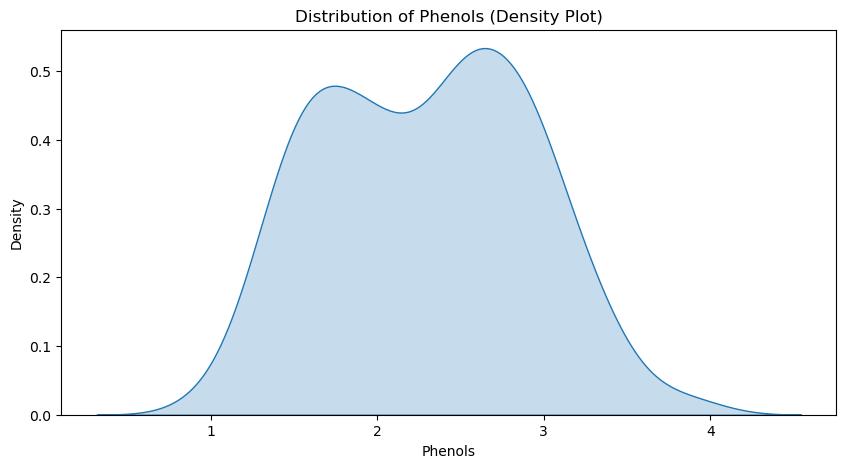

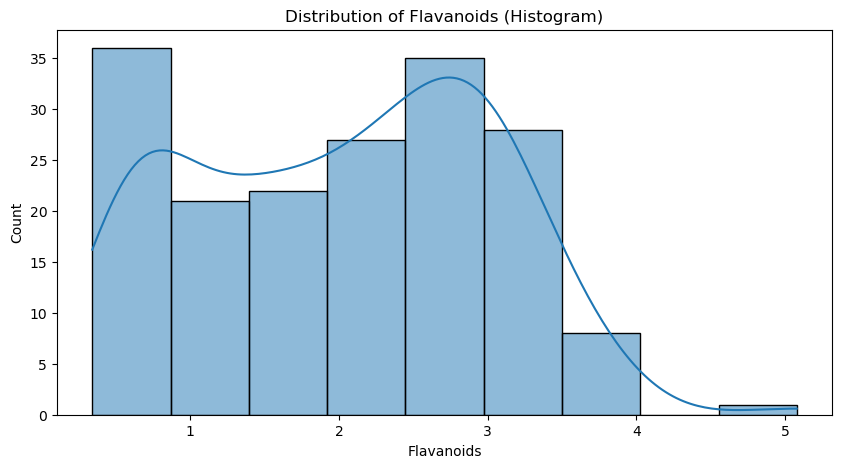

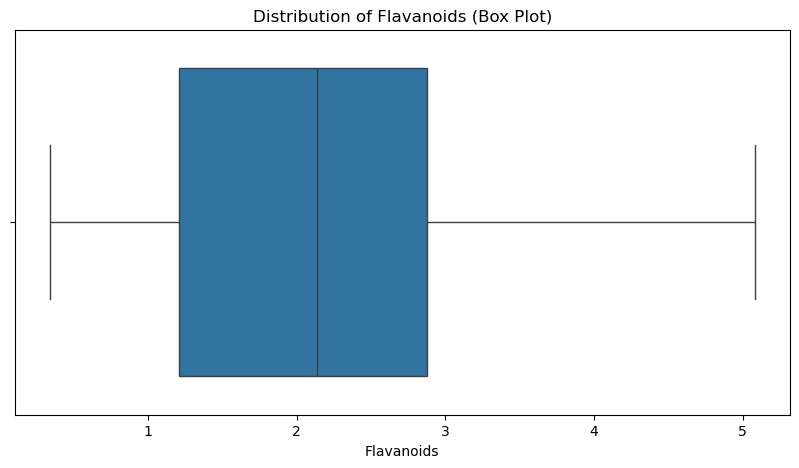

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


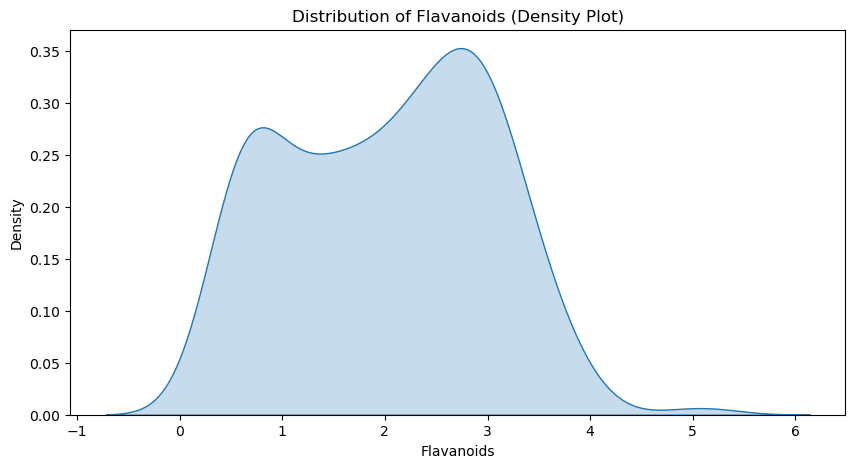

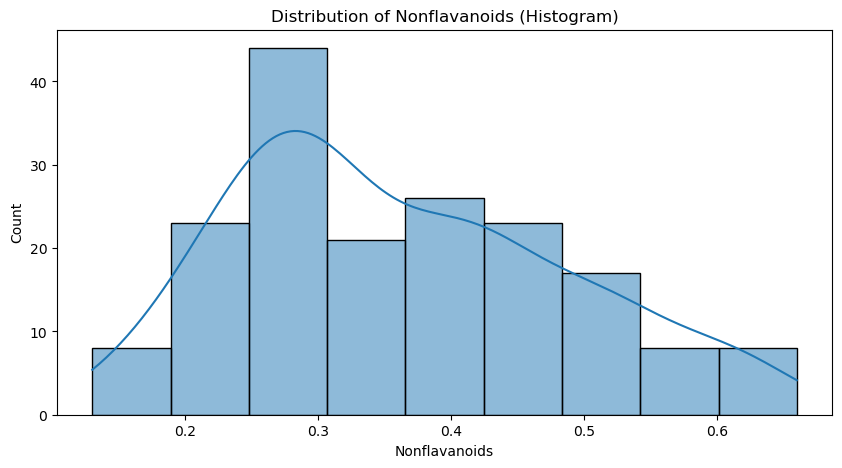

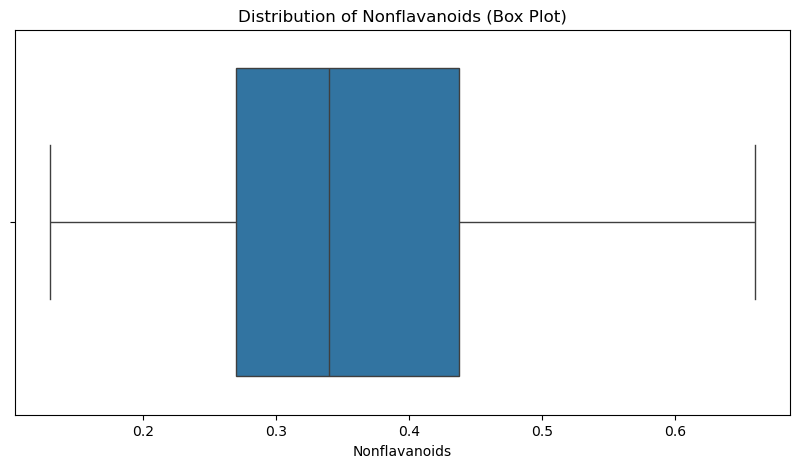

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


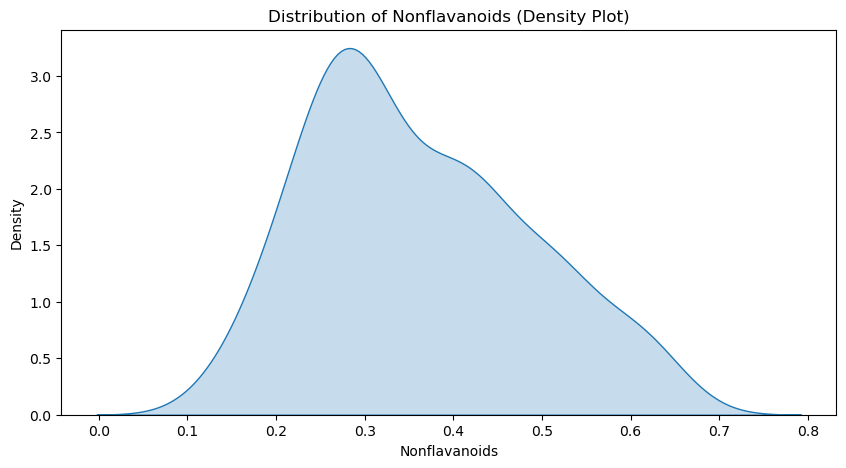

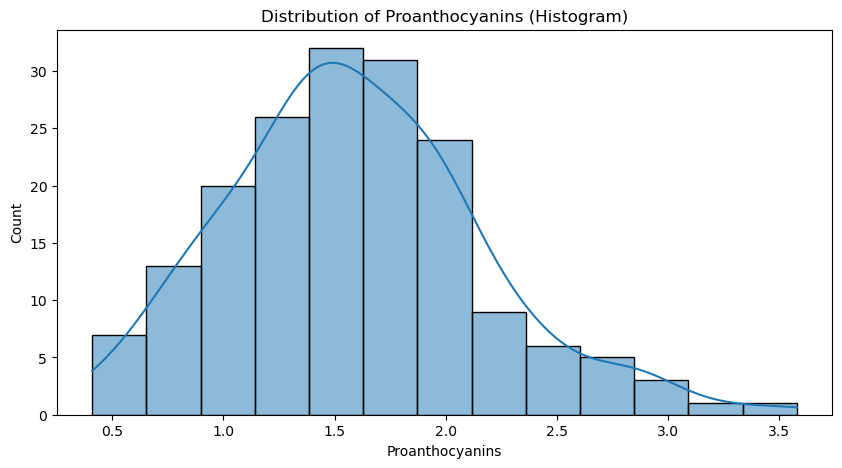

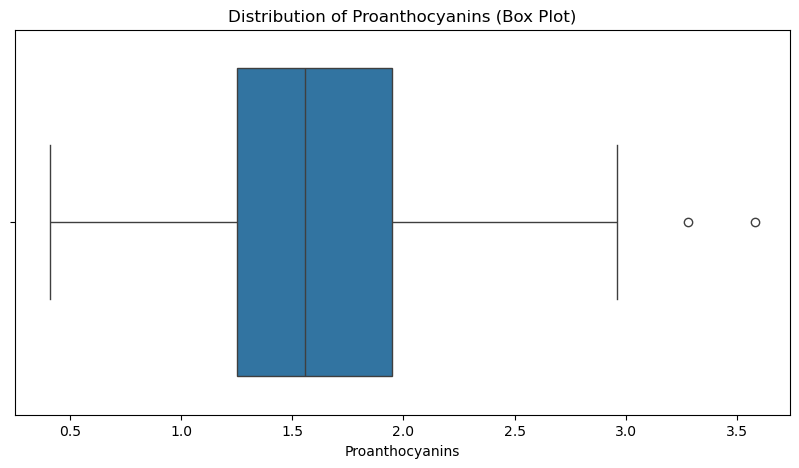

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


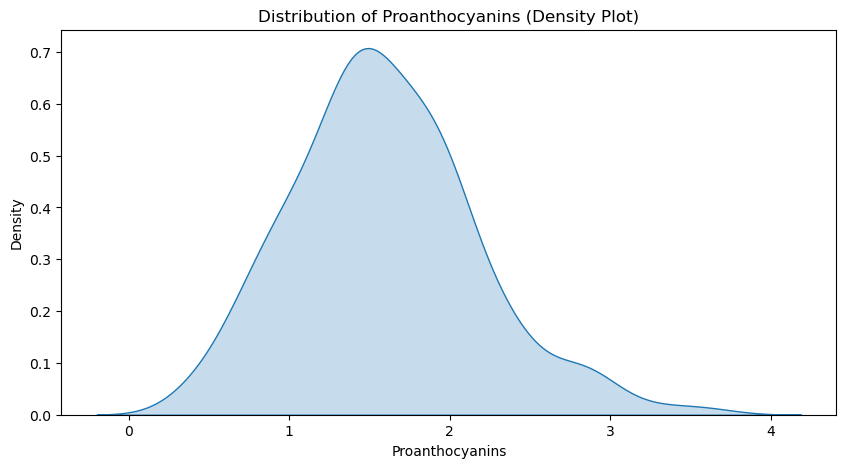

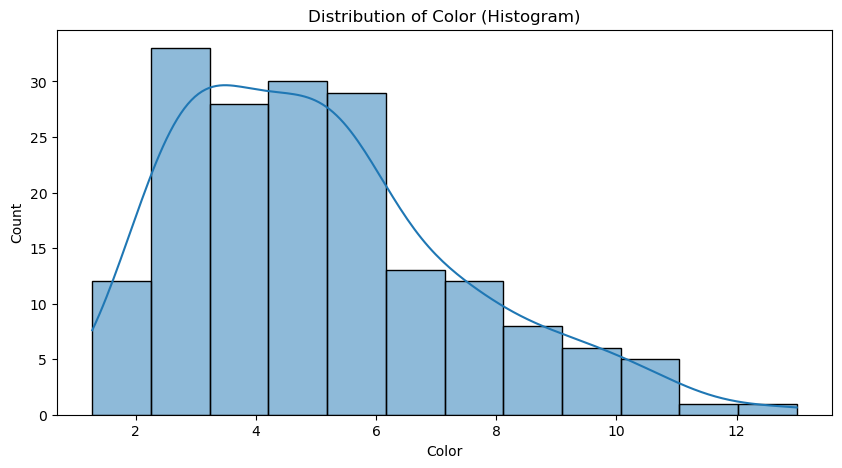

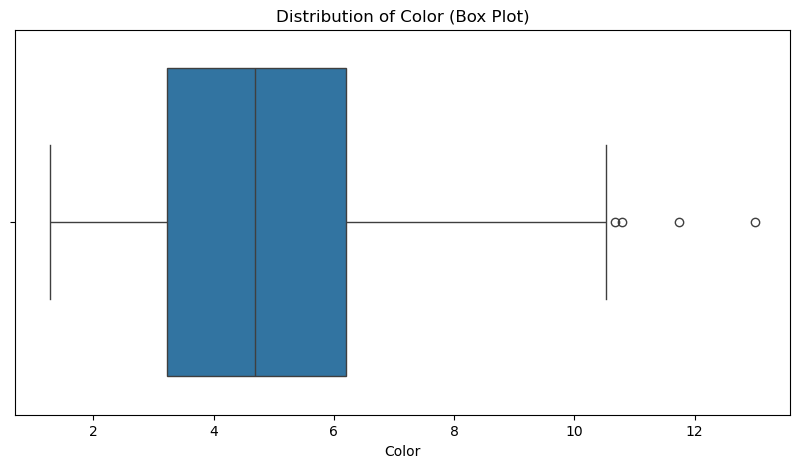

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


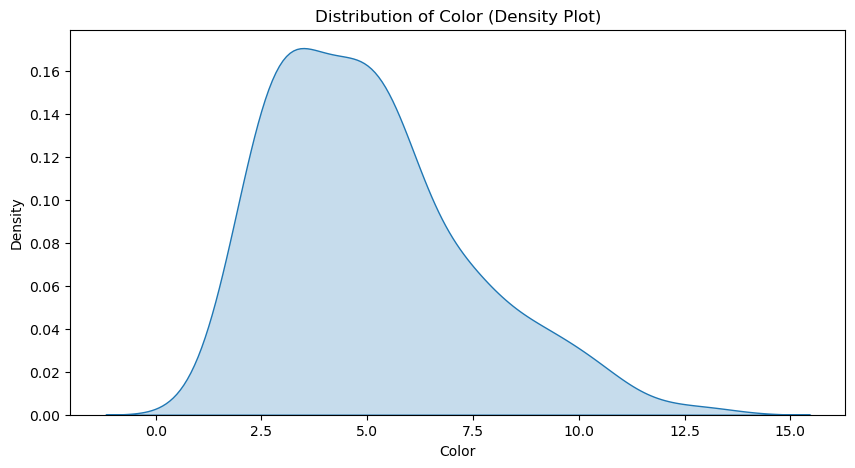

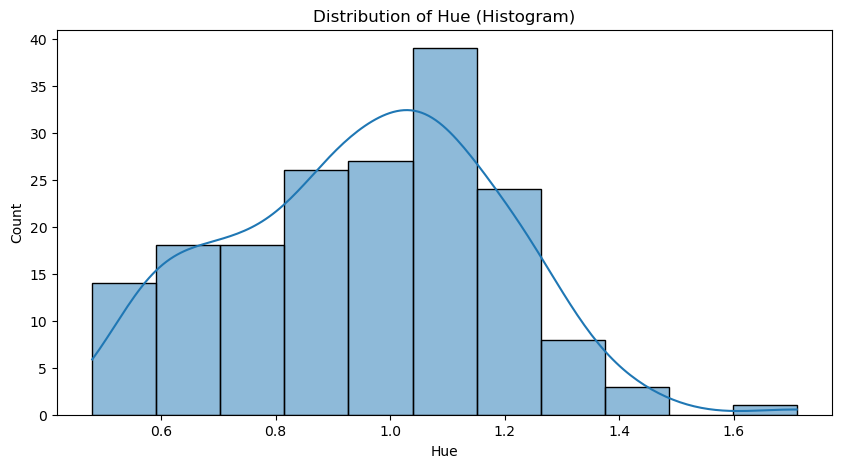

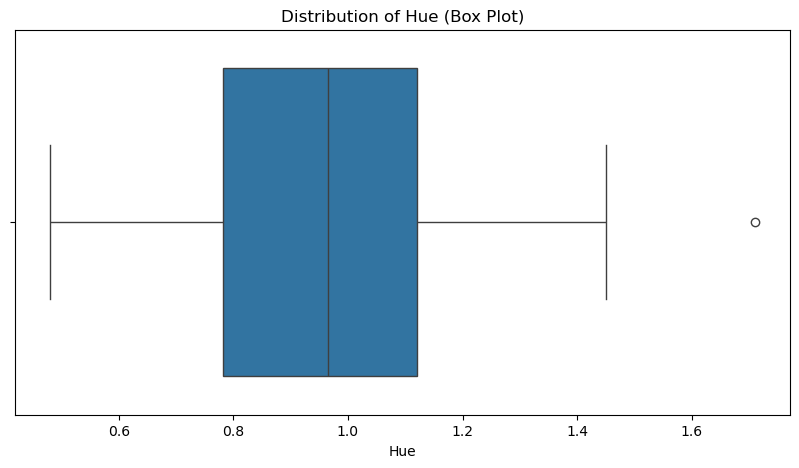

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


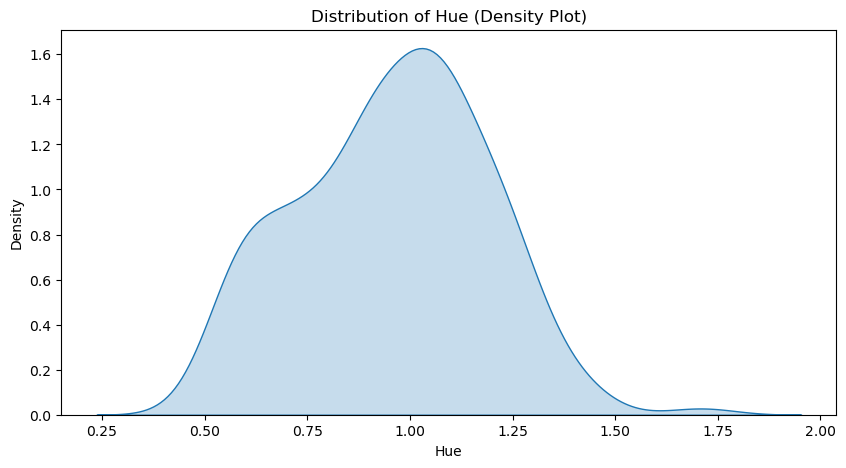

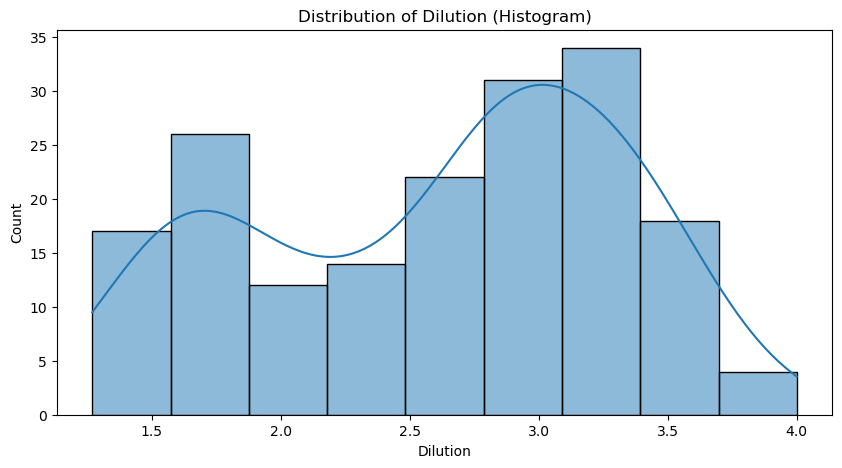

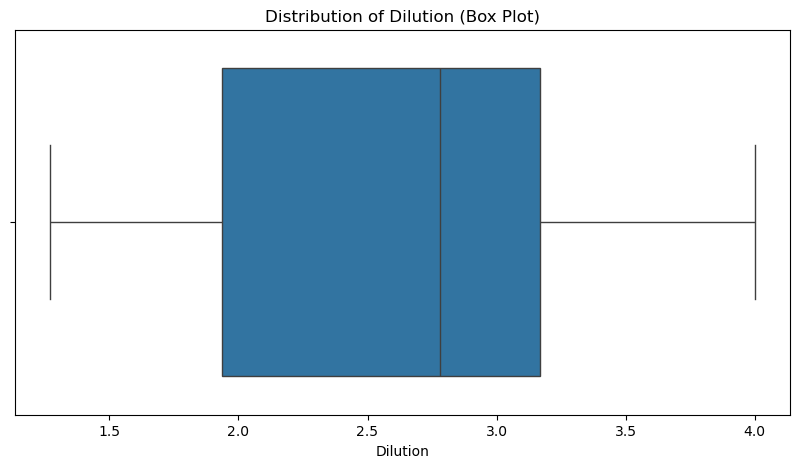

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


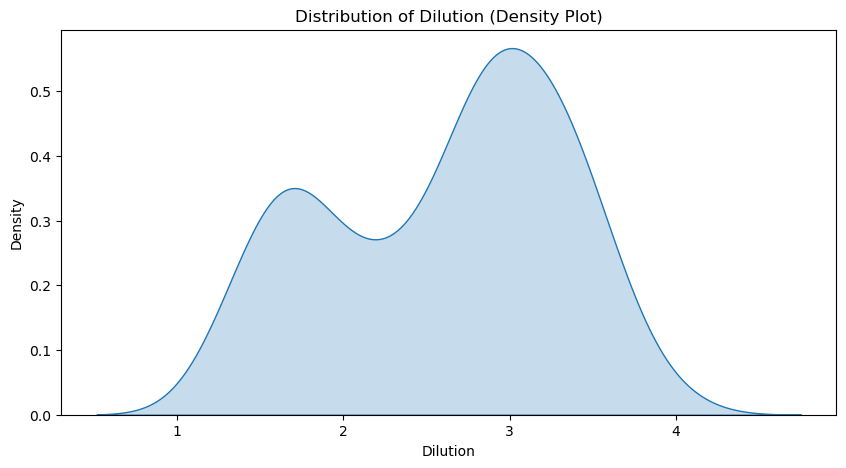

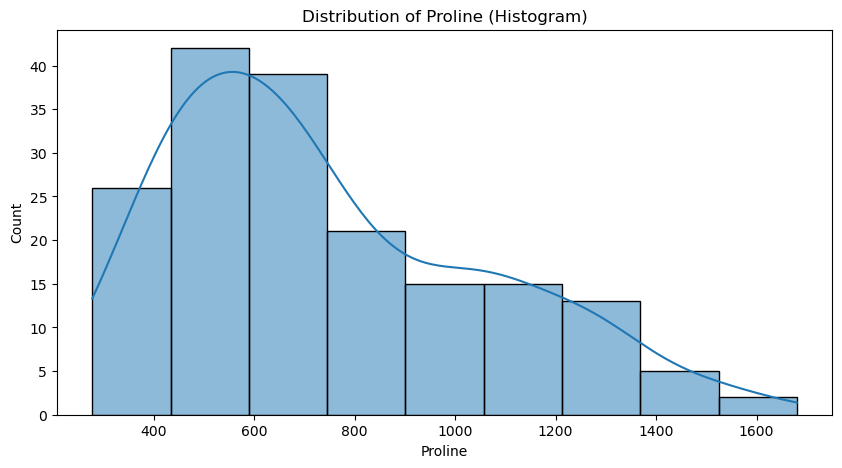

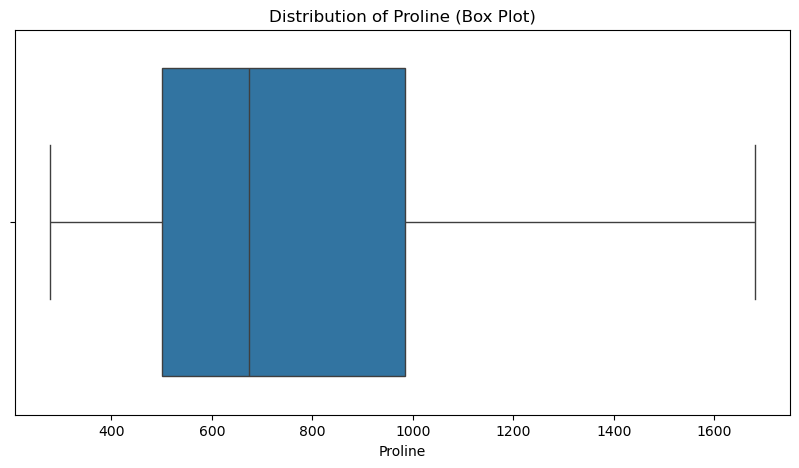

C:\Users\Ashish\AppData\Local\Temp\ipykernel_17832\2999734692.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)


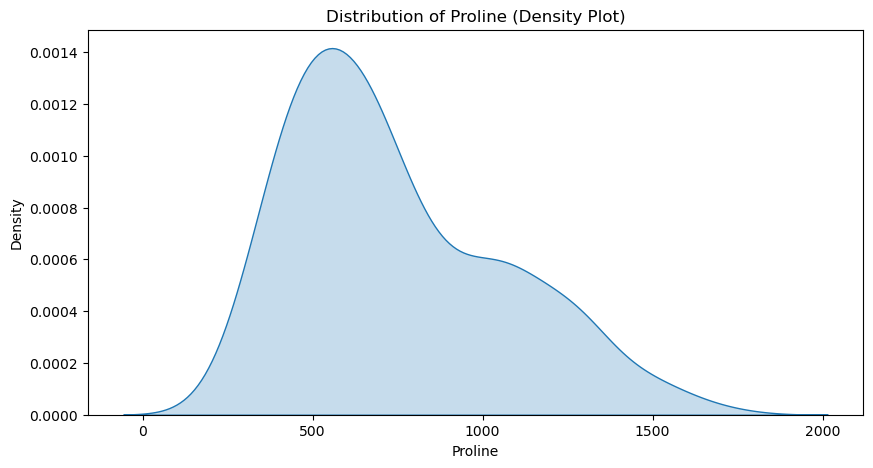

In [11]:
# Examine distributions 
for column in data.select_dtypes(include=np.number).columns:
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column} (Histogram)")
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f"Distribution of {column} (Box Plot)")
    plt.show()

    # Density plot
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[column], shade=True)
    plt.title(f"Distribution of {column} (Density Plot)")
    plt.show()

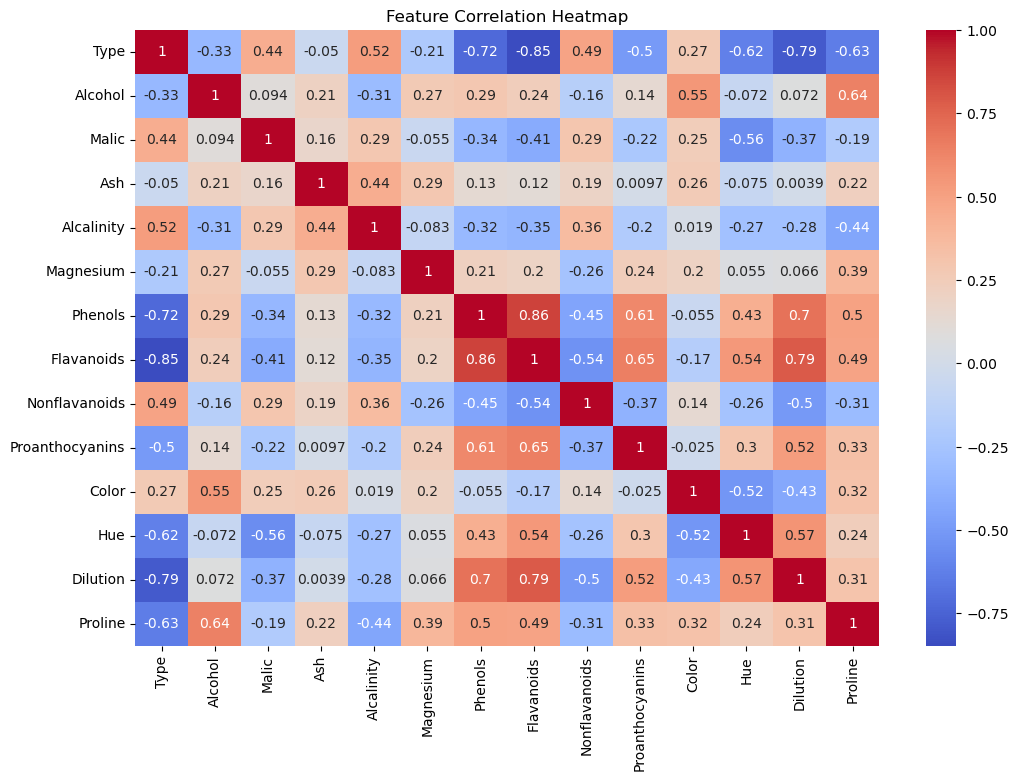

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))

In [17]:
# PCA implementation
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

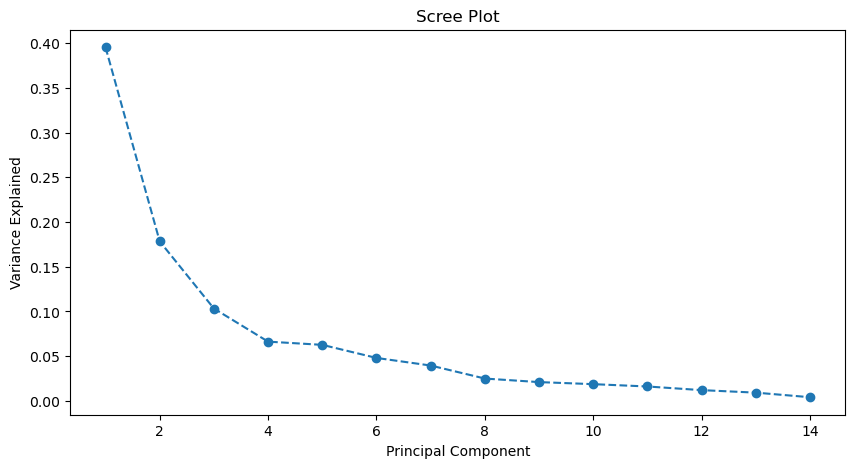

In [19]:
#Screen plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show()

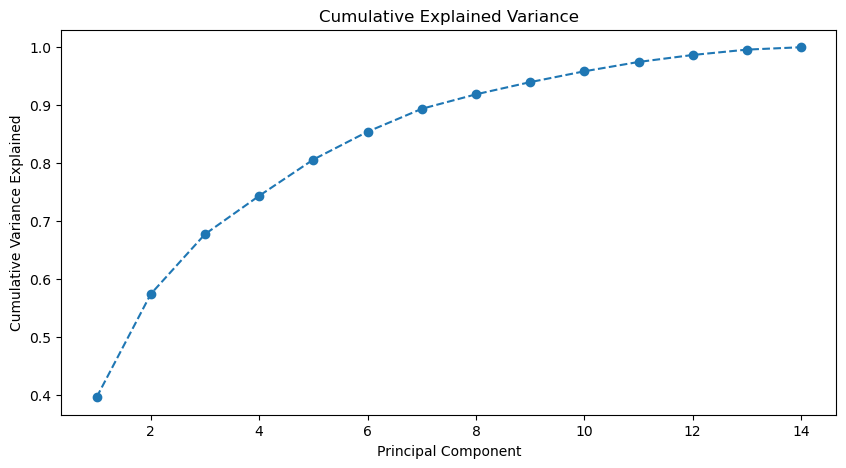

In [21]:
#Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Explained Variance")
plt.show()

In [47]:
# Transform dataset using PCA
# Choose the optimal number of components (e.g., 2)
optimal_components = 2
pca = PCA(n_components=optimal_components)
pca_transformed = pca.fit_transform(scaled_data)

In [49]:
#Clustering with Original Data
# K-means clustering
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


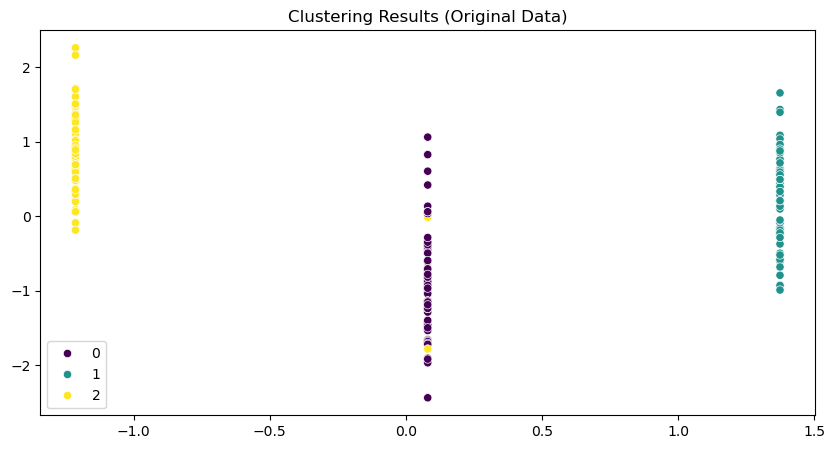

In [51]:
# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters_original, palette='viridis')
plt.title("Clustering Results (Original Data)")
plt.show()

In [53]:
# Evaluation
silhouette_original = silhouette_score(scaled_data, clusters_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, clusters_original)
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


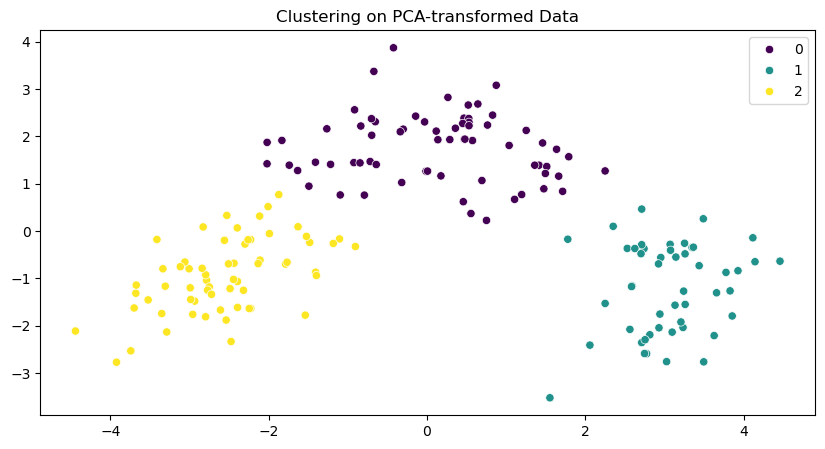

In [55]:
#Clustering with PCA Data

# K-means clustering on PCA data
clusters_pca = kmeans.fit_predict(pca_transformed)

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_pca, palette='viridis')
plt.title("Clustering on PCA-transformed Data")
plt.show()

In [57]:
# Evaluation
silhouette_pca = silhouette_score(pca_transformed, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_transformed, clusters_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

Silhouette Score (PCA Data): 0.6024415520362846
Davies-Bouldin Index (PCA Data): 0.5397078562575711


In [59]:
#Comparison and Analysis
print("\nComparison of Clustering Performance:")
print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")


Comparison of Clustering Performance:
Silhouette Score - Original Data: 0.30648398324833453, PCA Data: 0.6024415520362846
Davies-Bouldin Index - Original Data: 1.315707552261773, PCA Data: 0.5397078562575711


In [61]:
if silhouette_pca > silhouette_original:
    print("Clustering performance improved with PCA-transformed data.")
else:
    print("Clustering performance did not improve with PCA-transformed data.")


Clustering performance improved with PCA-transformed data.


In [63]:
if davies_bouldin_pca < davies_bouldin_original:
    print("Lower Davies-Bouldin Index indicates better clustering with PCA-transformed data.")
else:
    print("Higher Davies-Bouldin Index indicates worse clustering with PCA-transformed data.")

Lower Davies-Bouldin Index indicates better clustering with PCA-transformed data.


In [ ]:
#Conclusion and Insights 

#Summary of Key Findings and Insights:

1)Here Histograms, box plots, and density plots were used to illustrate the dataset's attributes and aid in the identification of any potential outliers, skewness, or odd distributions.
2)Understanding data redundancy and choosing features for PCA depend on the relationships between features, which were shown via a correlation heatmap.
3)Both the original data and the PCA-transformed data were subjected to K-Means clustering.
4)Finally,PCA-transformed data achieved comparable or better scores in clustering performance compared to the original data.

In [ ]:
#Practical Implications

#PCA-Based Dimensionality Reduction:

1)The curse of dimensionality, which can have a detrimental impact on clustering and predictive models, is reduced with PCA.
2)PCA lowers computing complexity and streamlines data display by converting correlated characteristics into orthogonal components.
3)By preserving the core of the dataset, PCA reduces noise and redundancy while improving analytical efficiency and interpretability.

#Clustering

1)Applications such as client profiling, anomaly detection, and pattern identification can benefit from segmentation made possible by clustering, which offers insights into the data's inherent groups.
2)Because PCA eliminates noise and redundancy and produces more robust and meaningful clusters, it is especially helpful when combined with clustering for datasets with a large number of features.

In [ ]:
#Recomendations

#When to Apply PCA:

1)We can use PCA when we suspect multicollinearity or redundancy in a dataset with a large number of features.
2)PCA assists in projecting data into 2D or 3D spaces when high-dimensional data visualization is required.
3)By concentrating on the most important patterns, PCA can be used to enhance the effectiveness of clustering methods or machine learning models.

#When to apply Clustering:

1)To find patterns or groupings in data, particularly in unsupervised learning problems,we can use clustering.
2)It is especially useful when segmentation is the aim, like putting customers in groups, spotting fraud, or recognizing unique habits.
3)To make sure the approach works for a particular dataset, apply clustering to both raw and PCA-transformed data, comparing the results.